In [2]:
import pandas as pd
import io
ratings_df = pd.read_csv("ratings.csv")
print(ratings_df.shape)

(100836, 4)


In [3]:
import pandas as pd
import io
movies_df = pd.read_csv('movies.csv')
print(movies_df.shape)

(9742, 3)


In [4]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
unique_user_ids = ratings_df['userId'].nunique()
print(unique_user_ids)

610


In [6]:
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

movie_ratings_count = merged_df.groupby('movieId')['rating'].count()

max_rated_movie_id = movie_ratings_count.idxmax()

max_rated_movie_title = movies_df[movies_df['movieId'] == max_rated_movie_id]['title'].iloc[0]

print({max_rated_movie_title})

{'Forrest Gump (1994)'}


In [7]:
matrix_movie_id = movies_df[movies_df['title'].str.contains('Matrix, The (1999)', case=False)]['movieId']

print(matrix_movie_id.unique())

[]


C:\Users\akhila\AppData\Local\Temp\ipykernel_18040\2604976147.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matrix_movie_id = movies_df[movies_df['title'].str.contains('Matrix, The (1999)', case=False)]['movieId']


In [8]:
import pandas as pd
import io

tags_df = pd.read_csv('tags.csv')

In [9]:
movie_id_matrix = 2571
matrix_tags = tags_df[tags_df['movieId'] == movie_id_matrix]['tag']

print(matrix_tags.unique())

['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [10]:
terminator_2_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]

terminator_2_ratings = ratings_df[ratings_df['movieId'] == terminator_2_movie_id]

average_rating = terminator_2_ratings['rating'].mean()

print(average_rating)

3.970982142857143


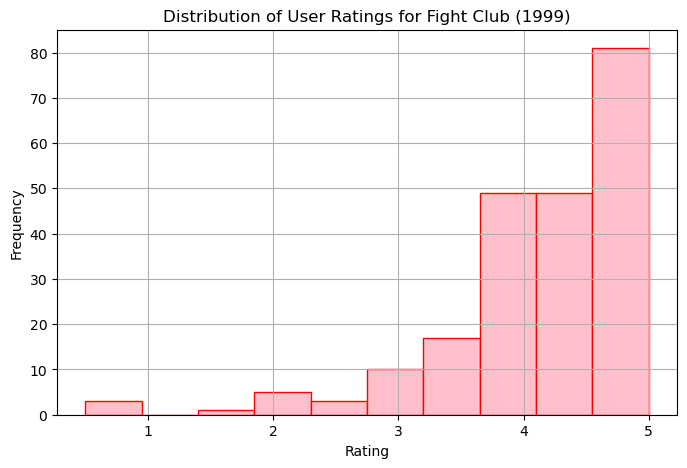

In [19]:
import matplotlib.pyplot as plt
fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].iloc[0]

fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]

plt.figure(figsize=(8, 5))
plt.hist(fight_club_ratings['rating'], bins=10, color='pink', edgecolor='red')
plt.title('Distribution of User Ratings for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

In [13]:
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

filtered_df = merged_df[merged_df['rating_count'] > 50]

print(filtered_df.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


In [14]:

most_popular_movie = filtered_df[filtered_df['rating_mean'] == filtered_df['rating_mean'].max()]

print(most_popular_movie[['title', 'rating_mean']])

                                title  rating_mean
277  Shawshank Redemption, The (1994)     4.429022


In [15]:
top_5_popular_movies = filtered_df.sort_values(by='rating_count', ascending=False).head(5)

print(top_5_popular_movies[['title', 'rating_count']])

                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [16]:
scifi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

sorted_scifi_movies = scifi_movies.sort_values(by='rating_count', ascending=False)

third_most_popular_scifi_movie = sorted_scifi_movies.iloc[2]
print(third_most_popular_scifi_movie[['title', 'rating_count']])

title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [17]:
matrix_movie_id = 2571
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag']

print("Unique tags for 'Matrix, The (1999)':")
print(matrix_tags.unique())

Unique tags for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']
